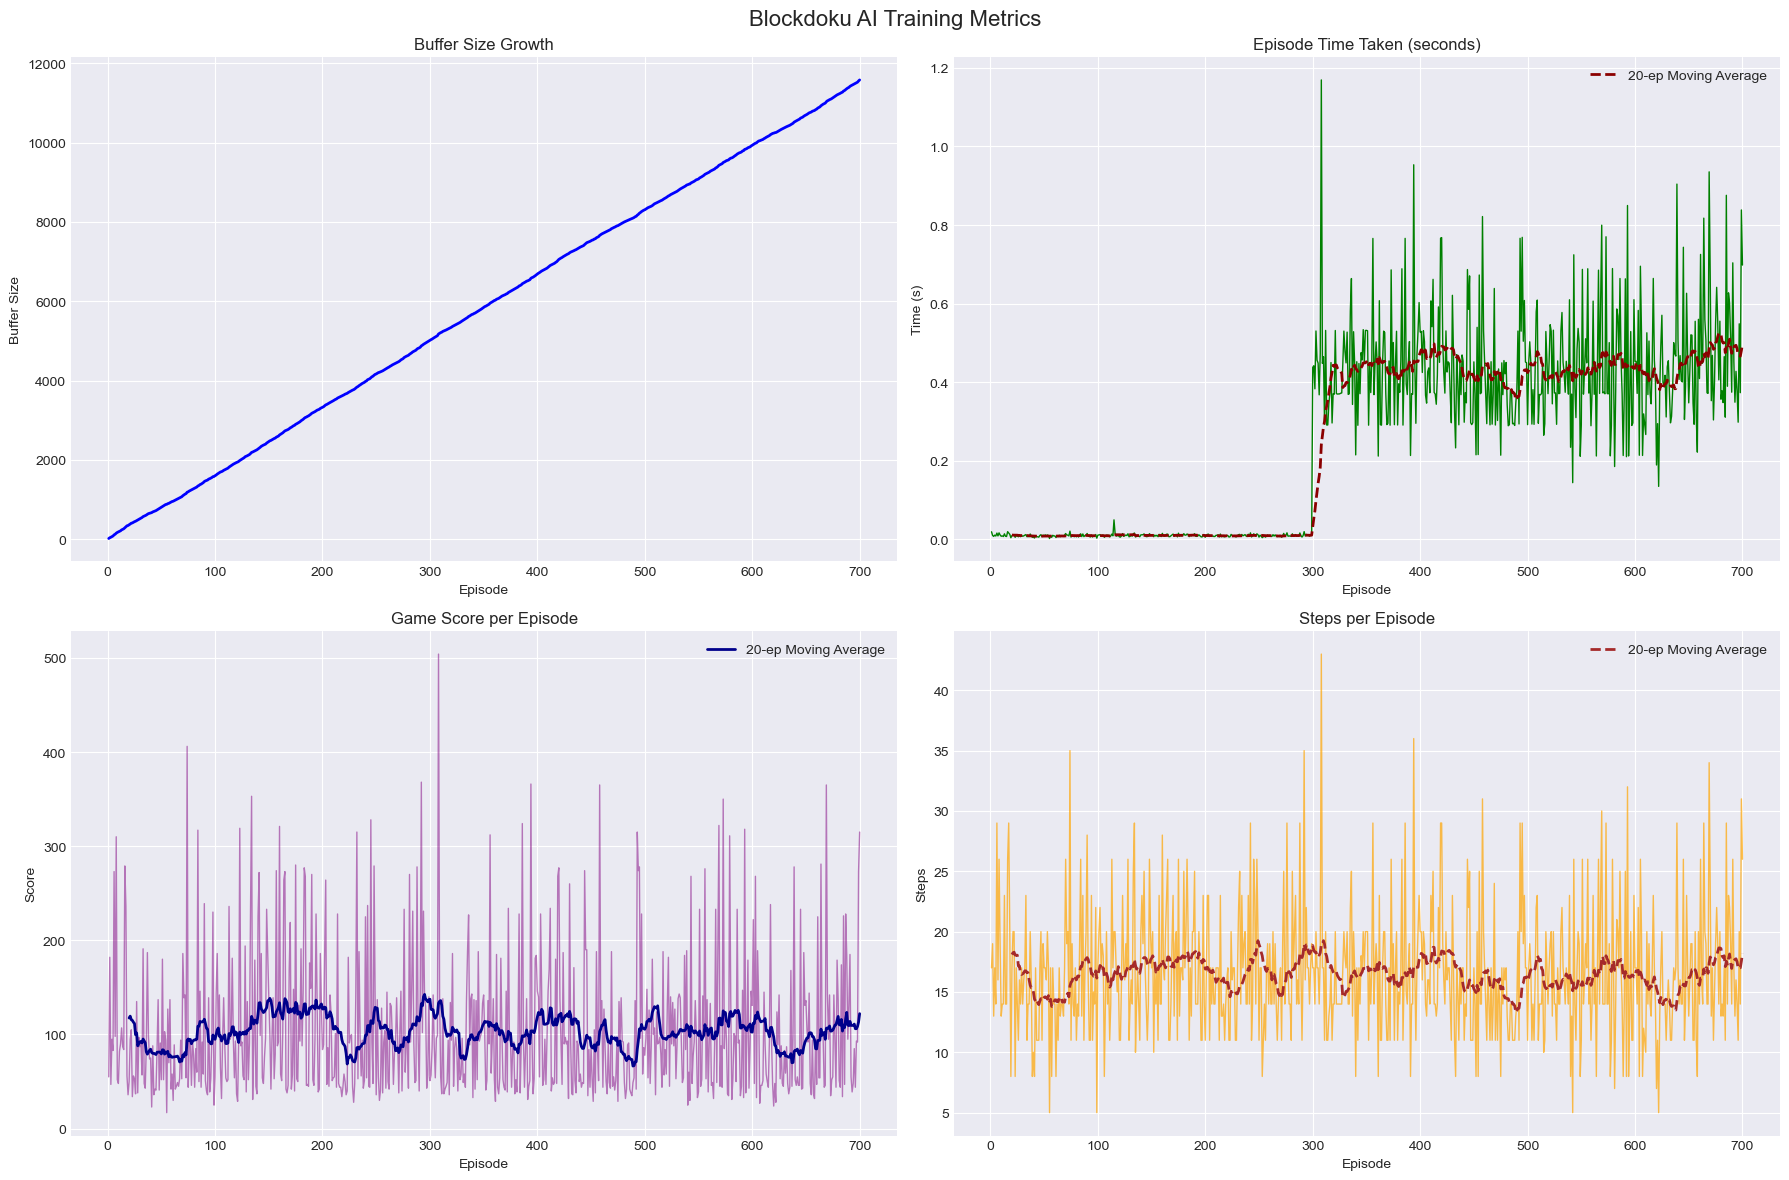

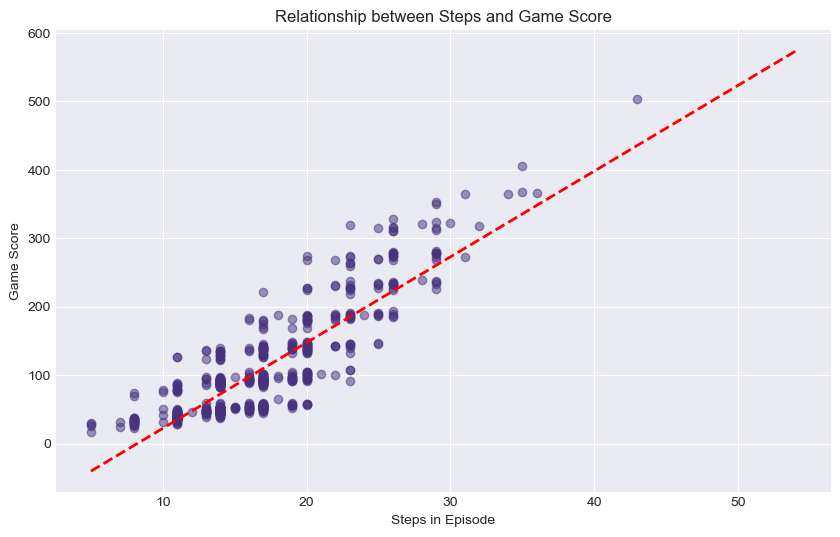

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns

# Load the data
with open("logs/training_log_20250424-180801.json", 'r') as f:
    data = json.load(f)

# Convert episodes list to DataFrame
df = pd.DataFrame(data['episodes'])

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Blockdoku AI Training Metrics', fontsize=16)

# 1. Buffer Size plot
axes[0, 0].plot(df['episode'], df['buffer_size'], color='blue', linewidth=2)
axes[0, 0].set_title('Buffer Size Growth')
axes[0, 0].set_xlabel('Episode')
axes[0, 0].set_ylabel('Buffer Size')
axes[0, 0].grid(True)

# 2. Time Taken plot
axes[0, 1].plot(df['episode'], df['time_taken'], color='green', linewidth=1)
axes[0, 1].set_title('Episode Time Taken (seconds)')
axes[0, 1].set_xlabel('Episode')
axes[0, 1].set_ylabel('Time (s)')
# Add a moving average line for time
window_size = 20
time_ma = df['time_taken'].rolling(window=window_size).mean()
axes[0, 1].plot(df['episode'][window_size-1:], time_ma[window_size-1:], 
                color='darkred', linewidth=2, linestyle='--',
                label=f'{window_size}-ep Moving Average')
axes[0, 1].legend()

# 3. Game Score plot
axes[1, 0].plot(df['episode'], df['game score'], color='purple', linewidth=1, alpha=0.5)
axes[1, 0].set_title('Game Score per Episode')
axes[1, 0].set_xlabel('Episode')
axes[1, 0].set_ylabel('Score')
# Add a moving average line for game score
score_ma = df['game score'].rolling(window=window_size).mean()
axes[1, 0].plot(df['episode'][window_size-1:], score_ma[window_size-1:], 
                color='darkblue', linewidth=2,
                label=f'{window_size}-ep Moving Average')
axes[1, 0].legend()

# 4. Steps per Episode plot
axes[1, 1].plot(df['episode'], df['steps'], color='orange', linewidth=1, alpha=0.7)
axes[1, 1].set_title('Steps per Episode')
axes[1, 1].set_xlabel('Episode')
axes[1, 1].set_ylabel('Steps')
# Add a moving average line for steps
steps_ma = df['steps'].rolling(window=window_size).mean()
axes[1, 1].plot(df['episode'][window_size-1:], steps_ma[window_size-1:], 
                color='brown', linewidth=2, linestyle='--',
                label=f'{window_size}-ep Moving Average')
axes[1, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.94)  # Adjust for title
plt.show()

# Create another figure to analyze the correlation between game score and steps
plt.figure(figsize=(10, 6))
plt.scatter(df['steps'], df['game score'], alpha=0.5)
plt.title('Relationship between Steps and Game Score')
plt.xlabel('Steps in Episode')
plt.ylabel('Game Score')
plt.grid(True)
# Add a trend line
z = np.polyfit(df['steps'], df['game score'], 1)
p = np.poly1d(z)
plt.plot(range(5, 55), p(range(5, 55)), "r--", linewidth=2)
plt.show()

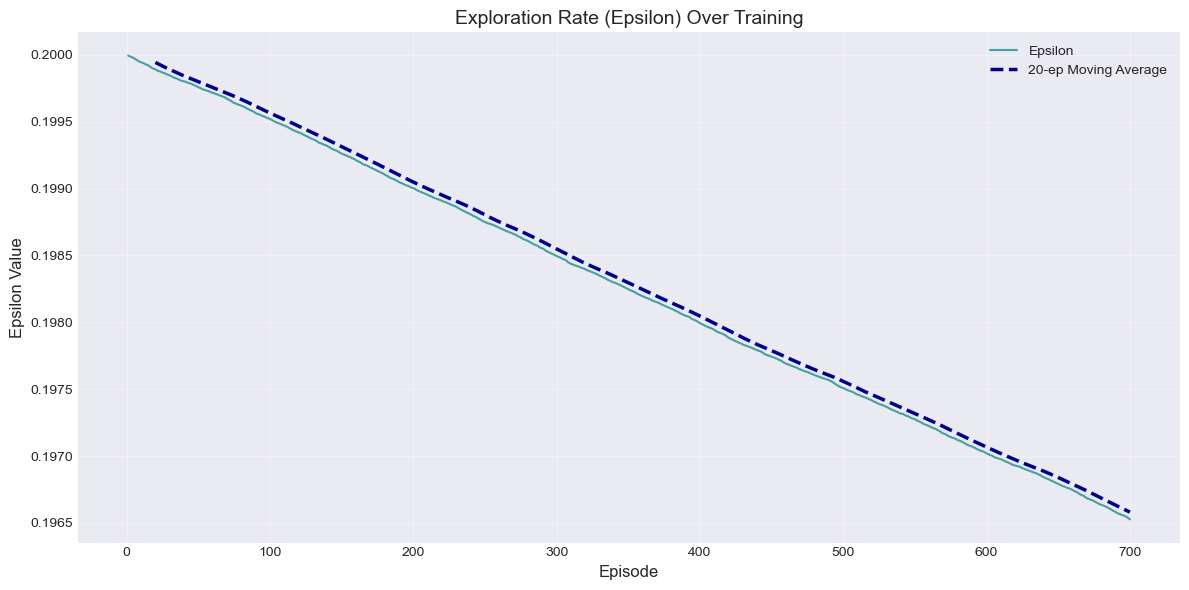

In [14]:
# Plot epsilon values over training
plt.figure(figsize=(12, 6))

# Main epsilon plot
plt.plot(df['episode'], df['epsilon'], color='teal', linewidth=1.5, alpha=0.7, label='Epsilon')

# Add moving average line
window_size = 20
epsilon_ma = df['epsilon'].rolling(window=window_size).mean()
plt.plot(df['episode'][window_size-1:], epsilon_ma[window_size-1:], 
         color='darkblue', linewidth=2.5, linestyle='--',
         label=f'{window_size}-ep Moving Average')

# Add styling and labels
plt.title('Exploration Rate (Epsilon) Over Training', fontsize=14)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Epsilon Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

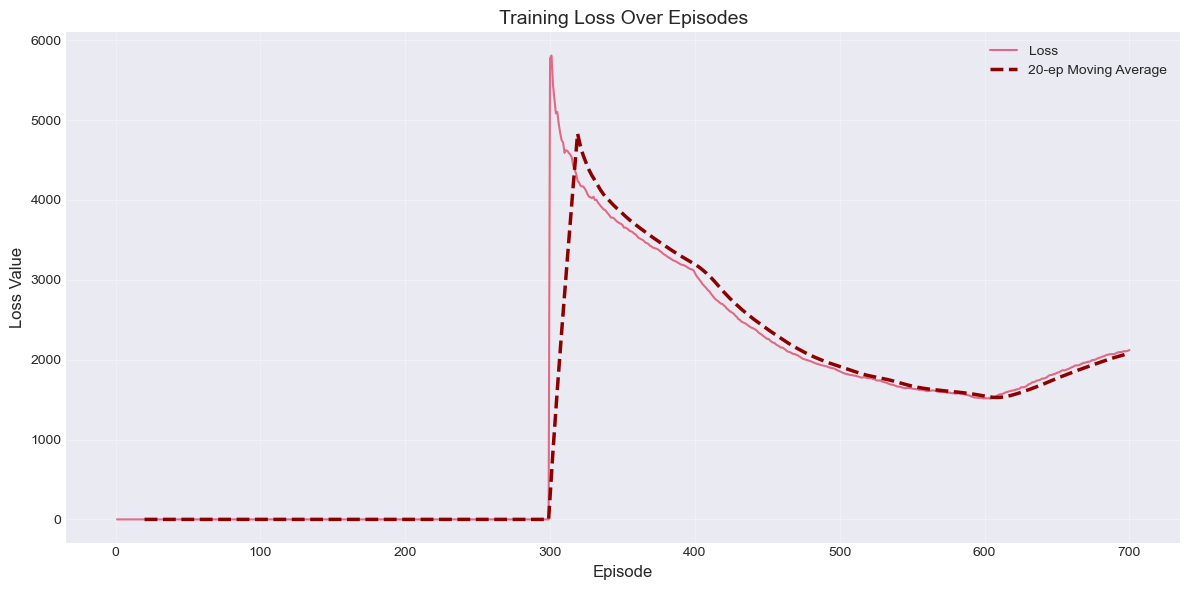

In [15]:
# Plot loss values over training
plt.figure(figsize=(12, 6))

# Check if loss data exists in the DataFrame
if 'avg_loss' in df.columns:
    # Main loss plot
    plt.plot(df['episode'], df['avg_loss'], color='crimson', linewidth=1.5, alpha=0.6, label='Loss')
    
    # Add moving average line
    window_size = 20
    loss_ma = df['avg_loss'].rolling(window=window_size).mean()
    plt.plot(df['episode'][window_size-1:], loss_ma[window_size-1:], 
             color='darkred', linewidth=2.5, linestyle='--',
             label=f'{window_size}-ep Moving Average')
    
    # Add styling and labels
    plt.title('Training Loss Over Episodes', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Loss Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("Loss data not found in the training log. Make sure 'avg_loss' is being recorded.")